In [8]:
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image

processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

image = Image.open("street.jpg").convert("RGB")
texts = ["a blue bag"]   # can be list of queries
inputs = processor(text=texts, images=image, return_tensors="pt")

outputs = model(**inputs)

In [9]:
# 4. Post-process the outputs to get bounding boxes and scores4
from PIL import ImageDraw
target_sizes = [image.size[::-1]]
results = processor.post_process_object_detection(outputs=outputs, target_sizes=target_sizes, threshold=0.1)
# 5. Draw the bounding boxes on the image
draw = ImageDraw.Draw(image)
for box, score, label in zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"]):
    # Convert the box coordinates to a list of integers
    box = [int(i) for i in box.tolist()]

    # Draw the rectangle
    draw.rectangle(box, outline="red", width=2)

    # Optionally, draw a label with the score
    # score_percentage = round(score.item() * 100, 2)
    # label_text = f"Vendor: {score_percentage}%"
    # draw.text((box[0], box[1] - 10), label_text, fill="red")

# 6. Save or show the image
image.save("output_with_boxes.jpeg")
print("Image with bounding boxes saved as 'output_with_boxes.jpeg'")

Image with bounding boxes saved as 'output_with_boxes.jpeg'


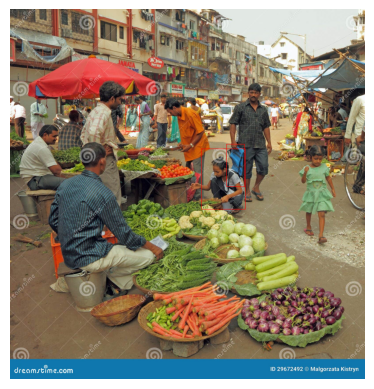

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.array(image))
plt.axis('off')
plt.show()
